# Analyzing the data set of YouTube channels
 
In this part of the project, we will use data science tools to clean and analyze the `summeryDB` dataset.
The dataset was create in [channels_statistics](channels_statistics.ipynb) jubyter notebook and to get insights from it. before collacation more data  




### Table of Contents

* [Imports](#chapter0)
* [Data preparation](#chapter1)
  * [Exploring the data](#section1)
  * [Cleaning the data](#section2)
  * [Adding new features](#section3)
* [Creating Visualizations](#chapter2)

### Imports <a class='anchor' id='chapter0'>

In this section we will  import the  libraries we need.

In [2]:

import datetime as dt
import pandas as pd
import seaborn as sns
import re
from datetime import date
import json
import matplotlib.pyplot as plt


%matplotlib inline


### Data preparation <a class='anchor' id='chapter1'>

In [3]:
summery_df = pd.read_csv('data/summeryDB.csv')

#### Exploring the data <a class='anchor' id='section1'>

In [4]:
summery_df.head()

,channelName,title,channelId,kind,url,gender,rank,description,country,viewCount,subscriberCount,videoCount,publishedAt,uploads
0,Programming with Mosh,Programming with Mosh,UCWv7vMbMWH4-V0ZXdmDpPBA,youtube#channel,https://www.youtube.com/c/programmingwithmosh/...,Male,1,I train professional software engineers that c...,AU,82263182,1830000,161,2014-10-07T00:40:53Z,UUWv7vMbMWH4-V0ZXdmDpPBA
1,Traversy Media,Traversy Media,UC29ju8bIPH5as8OGnQzwJyA,youtube#channel,https://www.youtube.com/user/TechGuyWeb,Male,2,Traversy Media features the best online web de...,US,142390124,1560000,881,2009-10-30T21:33:14Z,UU29ju8bIPH5as8OGnQzwJyA
2,Corey Schafer,Corey Schafer,UCCezIgC97PvUuR4_gbFUs5g,youtube#channel,https://www.youtube.com/user/schafer5,Male,3,Welcome to my Channel. This channel is focused...,US,58863870,792000,230,2006-05-31T22:49:22Z,UUCezIgC97PvUuR4_gbFUs5g
3,Tech With Tim,Tech With Tim,UC4JX40jDee_tINbkjycV4Sg,youtube#channel,https://m.youtube.com/channel/UC4JX40jDee_tINb...,Male,4,"Learn programming, software engineering, machi...",CA,51968790,680000,602,2014-04-23T01:57:10Z,UU4JX40jDee_tINbkjycV4Sg
4,Krish Naik,Krish Naik,UCNU_lfiiWBdtULKOw6X0Dig,youtube#channel,https://www.youtube.com/user/krishnaik06/playl...,Male,5,"I work as a Lead Data Scientist, pioneering in...",IN,28303465,390000,1102,2012-02-11T04:05:06Z,UUNU_lfiiWBdtULKOw6X0Dig


In [5]:
summery_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelName      67 non-null     object
 1   title            67 non-null     object
 2   channelId        67 non-null     object
 3   kind             67 non-null     object
 4   url              67 non-null     object
 5   gender           65 non-null     object
 6   rank             67 non-null     int64 
 7   description      66 non-null     object
 8   country          62 non-null     object
 9   viewCount        67 non-null     int64 
 10  subscriberCount  67 non-null     int64 
 11  videoCount       67 non-null     int64 
 12  publishedAt      67 non-null     object
 13  uploads          67 non-null     object
dtypes: int64(4), object(10)
memory usage: 7.5+ KB


We notice one missing value in the `description` column, and six in the `country` column.

In [ ]:
summery_df.describe(include='all')

,channelName,title,channelId,kind,url,description,country,viewCount,subscriberCount,videoCount,publishedAt,uploads
count,68,68,68,68,68,67,62,6.800000e+01,6.800000e+01,68.000000,68,68
unique,68,68,68,1,68,67,14,NaN,NaN,NaN,68,68
top,Clever Programmer,Clever Programmer,UCh9nVJoWXmFb7sLApWGcLPQ,youtube#channel,https://www.youtube.com/ImranSayedDev,Hey Aliens!!!\nI make free programming tutoria...,US,NaN,NaN,NaN,2018-04-28T14:50:54Z,UUbjozK_PYCTLEluFlrJ8UZg
freq,1,1,1,68,1,1,31,NaN,NaN,NaN,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.944904e+07,6.456419e+05,711.558824,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.010686e+07,1.005828e+06,1938.219019,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.646000e+03,8.600000e+01,9.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.728782e+06,9.987500e+04,141.750000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.950732e+07,3.050000e+05,310.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.553355e+07,7.122500e+05,876.750000,NaN,NaN


The column `kind` contine only one category. The coulum can easly be droped.   
We are going to change datetime format of the `publshedAt` column to yyyy-mm-dd.

#### Cleaning the data <a class='anchor' id='section2'>

Let's display rows missing values.

In [ ]:
summery_df[summery_df.isnull().any(axis=1)]

,channelName,title,channelId,kind,url,description,country,viewCount,subscriberCount,videoCount,publishedAt,uploads
20,Kalle Hallden,Kalle Hallden,UCWr0mx597DnSGLFk1WfvSkQ,youtube#channel,https://www.youtube.com/channel/UCWr0mx597DnSG...,"Hi, I am 300 moons old. I count everything in ...",NaN,31976843,503000,186,2015-10-18T20:39:56Z,UUWr0mx597DnSGLFk1WfvSkQ
32,Kyle Cook,Kyle Cook,UC_ov4ZPZej97M9kN1_lgtMg,youtube#channel,https://www.youtube.com/c/WebDevSimplified/pla...,"Kyle Cook, Director\nWestern Branch Middle Sch...",NaN,10652,161,9,2020-03-27T01:36:14.126848Z,UU_ov4ZPZej97M9kN1_lgtMg
33,Scott Hansellman,Scott Hanselman,UCL-fHOdarou-CR2XUmK48Og,youtube#channel,https://www.youtube.com/user/shanselman,I'm a teacher. I speak all over to whomever wi...,NaN,8895355,124000,307,2006-03-15T10:14:39Z,UUL-fHOdarou-CR2XUmK48Og
40,CodingEntrepreneurs,CodingEntrepreneurs,UCWEHue8kksIaktO8KTTN_zg,youtube#channel,https://www.youtube.com/user/CodingEntrepreneurs,Coding for Entrepreneurs is a Programming Seri...,NaN,15688637,178000,671,2013-06-30T00:56:13Z,UUWEHue8kksIaktO8KTTN_zg
50,Chris Coyier,Chris Coyier,UCADyUOnhyEoQqrw_RrsGleA,youtube#channel,https://www.youtube.com/user/realcsstricks,This is the official YouTube channel for CSS-T...,NaN,3641360,59200,292,2011-05-12T01:53:15Z,UUADyUOnhyEoQqrw_RrsGleA
54,chuck severance,Chuck Severance,UChYfrRp_CWyqOt-ZYJGOgmA,youtube#channel,https://m.youtube.com/user/csev,NaN,NaN,7701297,61200,876,2006-08-19T14:24:00Z,UUhYfrRp_CWyqOt-ZYJGOgmA


In [ ]:
country_count = summery_df.country.value_counts()
country_count

US    31
IN    11
CA     5
AU     3
NO     2
GB     2
DK     1
RO     1
EE     1
KR     1
PK     1
PL     1
DE     1
PE     1
Name: country, dtype: int64

The `US` is the `mode` of the `country` column, we can just replace the missing value in this column with `US`. 
```
summery_df['country'] = summery_df['country'].fillna(summery_df['country'].mode()[0])
```
Since we only have six missing values, we can check the YouTube web page for channels with a missing value to see if we can find the complete the missing values.   
After quick research we find all missing value in the country column, the missing values were all `US` (big suprise).
For the channel `Kyle Cook` we notice that we made a big mistake, we used the `channelId` of another YouTube channel with the exact name [Kyle Cook](https://www.youtube.com/user/StalkingKyle/featured) to collate the data of this channel.   
In fact, `Kyle Cook` has a YouTube channel related to programming but the channel name is [Web Dev Simplified](https://www.youtube.com/c/WebDevSimplified/pla...).
To fix the data on row `32`. 
We will make a query in this web site [https://developers.google.com](https://developers.google.com/youtube/v3/docs/channels/list?apix_params=%7B%22part%22%3A%5B%22snippet%2CcontentDetails%2Cstatistics%22%5D%2C%22id%22%3A%5B%22UCFbNIlppjAuEX4znoulh0Cw%22%5D%7D&apix=true) and copy the response.


In [ ]:
#filling the missing data
summery_df.country.fillna('US', inplace=True) #.value_counts()

In [ ]:
country_count = summery_df.country.value_counts()
country_count

US    37
IN    11
CA     5
AU     3
NO     2
GB     2
DK     1
RO     1
EE     1
KR     1
PK     1
PL     1
DE     1
PE     1
Name: country, dtype: int64

In [ ]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   channelName      68 non-null     object
 1   title            68 non-null     object
 2   channelId        68 non-null     object
 3   kind             68 non-null     object
 4   url              68 non-null     object
 5   description      67 non-null     object
 6   country          68 non-null     object
 7   viewCount        68 non-null     object
 8   subscriberCount  68 non-null     object
 9   videoCount       68 non-null     object
 10  publishedAt      68 non-null     object
 11  uploads          68 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


we will convert the type of `viewCount`, `subscriCount` and `videoCount` columnsto `int`.

In [ ]:
summery_df = summery_df.astype({'viewCount':'int64', 'subscriberCount':'int32', 'videoCount':'int32'}).copy()

we convert the type of `publishedAt` column to `datetime` type and keep only the date part, to result we be saved in new column `publishedDate`.

In [ ]:
summery_df['publishedDate'] = pd.to_datetime(pd.to_datetime(summery_df.publishedAt).dt.date)

In [ ]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channelName      68 non-null     object        
 1   title            68 non-null     object        
 2   channelId        68 non-null     object        
 3   kind             68 non-null     object        
 4   url              68 non-null     object        
 5   description      67 non-null     object        
 6   country          68 non-null     object        
 7   viewCount        68 non-null     int64         
 8   subscriberCount  68 non-null     int32         
 9   videoCount       68 non-null     int32         
 10  publishedAt      68 non-null     object        
 11  uploads          68 non-null     object        
 12  publishedDate    68 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 9.4+ KB


In [ ]:
summery_df.kind.value_counts()

youtube#channel    68
Name: kind, dtype: int64

We will drop `kind` column.

In [ ]:
summery_df.drop('kind', axis=1, inplace=True)

#### Adding new features <a class='anchor' id='section3'>

Adding new features to a data set can improve the performance of a model. 

In [ ]:
country_count = summery_df.country.value_counts()
country_count

US    37
IN    11
CA     5
AU     3
NO     2
GB     2
DK     1
RO     1
EE     1
KR     1
PK     1
PL     1
DE     1
PE     1
Name: country, dtype: int64

##### Country name column

It will be easier to recognize the country if we add the country name instead of only having the country code.  
In [The two-letter country code](country_abbreviation.ipynb) jupyter notebook, we have created a database that associates each country with the corresponding country code. This dataset will be used to create the new column `country` and the current column `country` will be renamed `countryCode`.

In [ ]:
country_code = pd.read_csv('data/two_letter_country_code.csv', index_col=0,  squeeze=True)

In [ ]:
country_code.head()

ISO 3166 ALPHA-2
AF       Afghanistan
AX     Aland Islands
AL           Albania
DZ           Algeria
AS    American Samoa
Name: Country, dtype: object

In [ ]:
country_list = country_count.index
country_list

Index(['US', 'IN', 'CA', 'AU', 'NO', 'GB', 'DK', 'RO', 'EE', 'KR', 'PK', 'PL',
       'DE', 'PE'],
      dtype='object')

Map the country code to the country name.

In [ ]:
country_map = {index:country_code[index] for index in country_list}

In [ ]:
country_map

{'AU': 'Australia',
 'CA': 'Canada',
 'DE': 'Germany',
 'DK': 'Denmark',
 'EE': 'Estonia',
 'GB': 'United Kingdom',
 'IN': 'India',
 'KR': 'South Korea',
 'NO': 'Norway',
 'PE': 'Peru',
 'PK': 'Pakistan',
 'PL': 'Poland',
 'RO': 'Romania',
 'US': 'United States'}

Groupe all the country with a single channel to a category called `Other`.

In [ ]:
country_map2 = {index:country_code[index]  if country_count.loc[index] > 1 else 'Other' for index in country_list}

In [ ]:
country_map2

{'AU': 'Australia',
 'CA': 'Canada',
 'DE': 'Other',
 'DK': 'Other',
 'EE': 'Other',
 'GB': 'United Kingdom',
 'IN': 'India',
 'KR': 'Other',
 'NO': 'Norway',
 'PE': 'Other',
 'PK': 'Other',
 'PL': 'Other',
 'RO': 'Other',
 'US': 'United States'}

Rename the current `country` column to `countryCode`.

In [ ]:
summery_df.rename({'country':'countryCode'}, axis=1, inplace=True)

Create the new `country` column.

In [ ]:
summery_df['country'] = summery_df.countryCode.map(country_map)

Create  new column called `countryOther`.

In [ ]:
summery_df['countryOther'] = summery_df.countryCode.map(country_map2)

In [ ]:
summery_df.head(5)

,channelName,title,channelId,url,description,countryCode,viewCount,subscriberCount,videoCount,publishedAt,uploads,publishedDate,country,countryOther
0,Programming with Mosh,Programming with Mosh,UCWv7vMbMWH4-V0ZXdmDpPBA,https://www.youtube.com/c/programmingwithmosh/...,I train professional software engineers that c...,AU,79813920,1790000,160,2014-10-07T00:40:53Z,UUWv7vMbMWH4-V0ZXdmDpPBA,2014-10-07,Australia,Australia
1,Traversy Media,Traversy Media,UC29ju8bIPH5as8OGnQzwJyA,https://www.youtube.com/user/TechGuyWeb,Traversy Media features the best online web de...,US,140038994,1540000,879,2009-10-30T21:33:14Z,UU29ju8bIPH5as8OGnQzwJyA,2009-10-30,United States,United States
2,Corey Schafer,Corey Schafer,UCCezIgC97PvUuR4_gbFUs5g,https://www.youtube.com/user/schafer5,Welcome to my Channel. This channel is focused...,US,57821417,782000,230,2006-05-31T22:49:22Z,UUCezIgC97PvUuR4_gbFUs5g,2006-05-31,United States,United States
3,Tech With Tim,Tech With Tim,UC4JX40jDee_tINbkjycV4Sg,https://m.youtube.com/channel/UC4JX40jDee_tINb...,"Learn programming, software engineering, machi...",CA,50278115,664000,591,2014-04-23T01:57:10Z,UU4JX40jDee_tINbkjycV4Sg,2014-04-23,Canada,Canada
4,Krish Naik,Krish Naik,UCNU_lfiiWBdtULKOw6X0Dig,https://www.youtube.com/user/krishnaik06/playl...,"I work as a Lead Data Scientist, pioneering in...",IN,26639800,375000,1061,2012-02-11T04:05:06Z,UUNU_lfiiWBdtULKOw6X0Dig,2012-02-11,India,India


In [ ]:
summery_df.countryOther.value_counts()

United States     37
India             11
Other              8
Canada             5
Australia          3
Norway             2
United Kingdom     2
Name: countryOther, dtype: int64

In [ ]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channelName      68 non-null     object        
 1   title            68 non-null     object        
 2   channelId        68 non-null     object        
 3   url              68 non-null     object        
 4   description      67 non-null     object        
 5   countryCode      68 non-null     object        
 6   viewCount        68 non-null     int64         
 7   subscriberCount  68 non-null     int32         
 8   videoCount       68 non-null     int32         
 9   publishedAt      68 non-null     object        
 10  uploads          68 non-null     object        
 11  publishedDate    68 non-null     datetime64[ns]
 12  country          68 non-null     object        
 13  countryOther     68 non-null     object        
dtypes: datetime64[ns](1), int32(2), int64(1), ob

##### Continent name column

In [ ]:
continent =  pd.read_csv('/content/drive/My Drive/summery_df/continent_country_code.csv', keep_default_na=False, index_col='a-2')

In [ ]:
continent.head()

,CC,continent
a-2,,
AF,AS,Asia
AL,EU,Europe
AQ,AN,Antarctica
DZ,AF,Africa
AS,OC,Oceania


Map the country  to continent name

In [ ]:
continent_map = {index:continent.continent[index] for index in country_list}

In [ ]:
continent_map

{'AU': 'Oceania',
 'CA': 'North america',
 'DE': 'Europe',
 'DK': 'Europe',
 'EE': 'Europe',
 'GB': 'Europe',
 'IN': 'Asia',
 'KR': 'Asia',
 'NO': 'Europe',
 'PE': 'South america',
 'PK': 'Asia',
 'PL': 'Europe',
 'RO': 'Europe',
 'US': 'North america'}

Create new column `continent`

In [ ]:
summery_df['continent'] = summery_df.countryCode.map(continent_map)

In [ ]:
summery_df['continent'].value_counts()

North america    42
Asia             13
Europe            9
Oceania           3
South america     1
Name: continent, dtype: int64

In [ ]:
summery_df.head()

,channelName,title,channelId,url,description,countryCode,viewCount,subscriberCount,videoCount,publishedAt,uploads,publishedDate,country,countryOther,continent
0,Programming with Mosh,Programming with Mosh,UCWv7vMbMWH4-V0ZXdmDpPBA,https://www.youtube.com/c/programmingwithmosh/...,I train professional software engineers that c...,AU,79813920,1790000,160,2014-10-07T00:40:53Z,UUWv7vMbMWH4-V0ZXdmDpPBA,2014-10-07,Australia,Australia,Oceania
1,Traversy Media,Traversy Media,UC29ju8bIPH5as8OGnQzwJyA,https://www.youtube.com/user/TechGuyWeb,Traversy Media features the best online web de...,US,140038994,1540000,879,2009-10-30T21:33:14Z,UU29ju8bIPH5as8OGnQzwJyA,2009-10-30,United States,United States,North america
2,Corey Schafer,Corey Schafer,UCCezIgC97PvUuR4_gbFUs5g,https://www.youtube.com/user/schafer5,Welcome to my Channel. This channel is focused...,US,57821417,782000,230,2006-05-31T22:49:22Z,UUCezIgC97PvUuR4_gbFUs5g,2006-05-31,United States,United States,North america
3,Tech With Tim,Tech With Tim,UC4JX40jDee_tINbkjycV4Sg,https://m.youtube.com/channel/UC4JX40jDee_tINb...,"Learn programming, software engineering, machi...",CA,50278115,664000,591,2014-04-23T01:57:10Z,UU4JX40jDee_tINbkjycV4Sg,2014-04-23,Canada,Canada,North america
4,Krish Naik,Krish Naik,UCNU_lfiiWBdtULKOw6X0Dig,https://www.youtube.com/user/krishnaik06/playl...,"I work as a Lead Data Scientist, pioneering in...",IN,26639800,375000,1061,2012-02-11T04:05:06Z,UUNU_lfiiWBdtULKOw6X0Dig,2012-02-11,India,India,Asia


In [ ]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channelName      68 non-null     object        
 1   title            68 non-null     object        
 2   channelId        68 non-null     object        
 3   url              68 non-null     object        
 4   description      67 non-null     object        
 5   countryCode      68 non-null     object        
 6   viewCount        68 non-null     int64         
 7   subscriberCount  68 non-null     int32         
 8   videoCount       68 non-null     int32         
 9   publishedAt      68 non-null     object        
 10  uploads          68 non-null     object        
 11  publishedDate    68 non-null     datetime64[ns]
 12  country          68 non-null     object        
 13  countryOther     68 non-null     object        
 14  continent        68 non-null     object     

We will  convert the type of the columns `country`, `countryCode`, `countryOther` and `continent` to categorical.

In [ ]:
summery_df = summery_df.astype({'country':'category', 'countryCode':'category', 'countryOther':'category', 'continent':'category'}).copy()

In [ ]:
summery_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channelName      68 non-null     object        
 1   title            68 non-null     object        
 2   channelId        68 non-null     object        
 3   url              68 non-null     object        
 4   description      67 non-null     object        
 5   countryCode      68 non-null     category      
 6   viewCount        68 non-null     int64         
 7   subscriberCount  68 non-null     int32         
 8   videoCount       68 non-null     int32         
 9   publishedAt      68 non-null     object        
 10  uploads          68 non-null     object        
 11  publishedDate    68 non-null     datetime64[ns]
 12  country          68 non-null     category      
 13  countryOther     68 non-null     category      
 14  continent        68 non-null     category   

##### Gender column

It is well known that the tech industry is still a male-dominated sector. This article about [" women in technology"] (https://builtin.com/women-tech/women-in-tech-workplace-statistics) provides some statistical insight about this important topic.   
To we are adding `gender` column to dataset, we asking someone to through the dataset to add. 


 issue with gender diversity

In [ ]:
summery_df.gender.value_counts()

m    65
f     2
Name: gender, dtype: int64

In [ ]:
summery_df[summery_df.isnull().any(axis=1)]

,channelName,title,channelId,url,description,countryCode,viewCount,subscriberCount,videoCount,publishedAt,uploads,publishedDate,country,countryOther,continent,gender
5,freeCodeCamp.org,freeCodeCamp.org,UC8butISFwT-Wl7EV0hUK0BQ,https://www.youtube.com/channel/UC8butISFwT-Wl...,Learn to code for free.,US,188631396,3660000,1151,2014-12-16T21:18:48Z,UU8butISFwT-Wl7EV0hUK0BQ,2014-12-16,United States,United States,North america,NaN
54,chuck severance,Chuck Severance,UChYfrRp_CWyqOt-ZYJGOgmA,https://m.youtube.com/user/csev,NaN,US,7701297,61200,876,2006-08-19T14:24:00Z,UUhYfrRp_CWyqOt-ZYJGOgmA,2006-08-19,United States,United States,North america,m


### Creating Visualizations <a class='anchor' id='chapter3'>

##### Country & Continent column

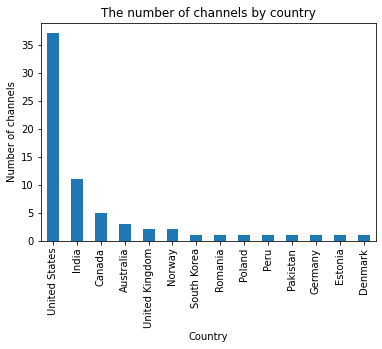

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
_ = summery_df['country'].value_counts().plot.bar()
plt.xlabel('Country')
plt.ylabel('Number of channels')
plt.title('The number of channels by country')
plt.show()

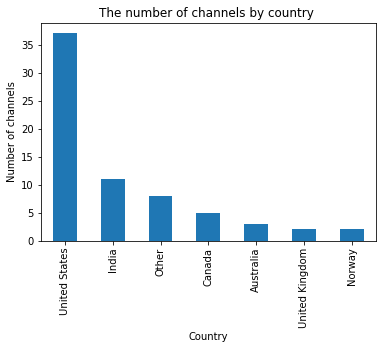

In [ ]:
plt.figure()
_ = summery_df['countryOther'].value_counts().plot.bar()
plt.xlabel('Country')
plt.ylabel('Number of channels')
plt.title('The number of channels by country ')
plt.show()

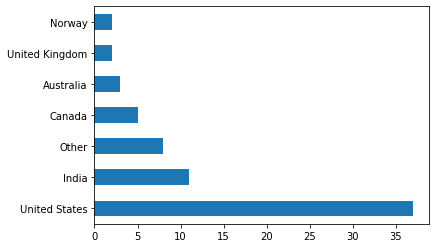

In [ ]:
# we can horizontal plot
_ = summery_df['countryOther'].value_counts().plot.barh()

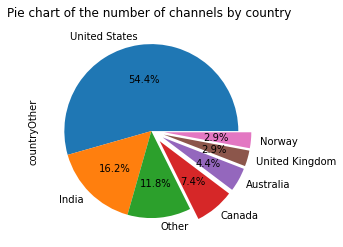

In [ ]:
explode = (0,0,0, 0.15,0.15, 0.15,0.15,)
summery_df['countryOther'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%')
plt.title('Pie chart of the number of channels by country ')
plt.show()

Plot show that the half of the channels are based in US than in India.

In [ ]:
summery_df.continent.value_counts()

North america    42
Asia             13
Europe            9
Oceania           3
South america     1
Name: continent, dtype: int64

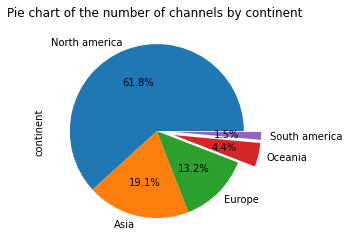

In [ ]:
explode = (0,0,0, 0.2,0.2,)
summery_df['continent'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%')
plt.title('Pie chart of the number of channels by continent ')
plt.show()

##### Top 10

###### Video Count

In [ ]:
def top10(df,column,sort_ascending=False,n=10, set_index=None):
  '''
  return the n top value in given DataFrame for give column

  Args:
  df (DataFrame):
  column (string): column name
  sort_ascending (bool): sort ascending the value if True
  n (int): number of rows to return
  set_index: 

  return:
  DataFrame with n rows
  '''

  if set_index:

    return df.set_index(set_index).sort_values(by=column,ascending=sort_ascending).videoCount.head(n)
    
  else:

    return df.sort_values(by=column,ascending=sort_ascending).videoCount.head(n)

In [ ]:
top10(summery_df,'videoCount',sort_ascending=False,n=10, set_index='title')

title
Durga Software Solutions    16092
Telusko                      1458
Caleb Curry                  1386
Perfect Web Solutions        1283
CodeWithHarry                1244
sentdex                      1225
Derek Banas                  1158
freeCodeCamp.org             1151
The Coding Train             1112
Ben Awad                     1082
Name: videoCount, dtype: int32

In [ ]:
top10VideoCount = summery_df.set_index('title').sort_values(by=['videoCount'],ascending=False).videoCount.head(10)

In [ ]:
top10VideoCount

title
Durga Software Solutions    16092
Telusko                      1458
Caleb Curry                  1386
Perfect Web Solutions        1283
CodeWithHarry                1244
sentdex                      1225
Derek Banas                  1158
freeCodeCamp.org             1151
The Coding Train             1112
Ben Awad                     1082
Name: videoCount, dtype: int32

In [ ]:
summery_df.set_index('title').sort_values(by=['videoCount'],ascending=False)[['videoCount', 'country', 'publishedDate']].head(10)

,videoCount,country,publishedDate
title,,,
Durga Software Solutions,16092,India,2014-02-03
Telusko,1458,India,2014-04-29
Caleb Curry,1386,United States,2009-08-18
Perfect Web Solutions,1283,Pakistan,2015-06-26
CodeWithHarry,1244,India,2018-04-28
sentdex,1225,United States,2012-12-16
Derek Banas,1158,United States,2008-08-12
freeCodeCamp.org,1151,United States,2014-12-16
The Coding Train,1112,United States,2006-07-03


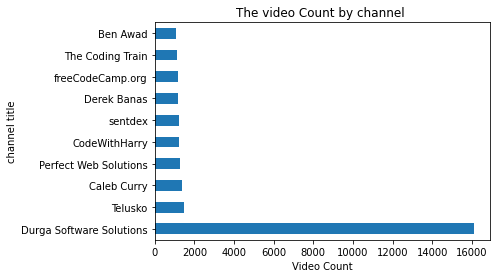

In [ ]:
plt.figure()
top10VideoCount.plot.barh()
plt.xlabel('Video Count')
plt.ylabel('channel title')
plt.title('The video Count by channel ')
plt.show()

The Durga Software Solutions channel has by far the largest number of videos, ten times more than the channel that comes next.  look like an outlers.   
DURGA Software Solutions is also an institute in Hyderabad, one of the largest cities in India, which may explain this number.


The plot above suggests, that there is an ouliers,  we use boxplot t. 

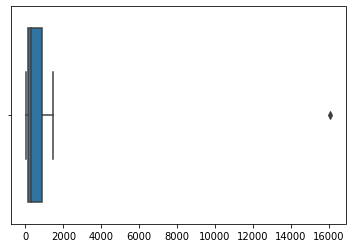

In [ ]:
import seaborn as sns
sns.boxplot(x=summery_df.videoCount.values)
plt.show()

the is outlier, it plotted as individual points.

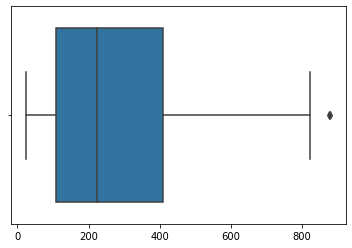

In [ ]:
sns.boxplot(x=summery_df.sort_values(by=['videoCount'],ascending=False).videoCount.loc[1:].values)
plt.show()

the boxplot when we remove Durga Software Solutions channe row.

###### View Count

In [ ]:
top10ViewCount = summery_df.set_index('title').sort_values(by=['viewCount'],ascending=False).viewCount.head(10)


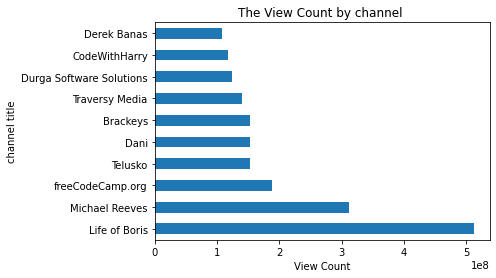

In [ ]:
plt.figure()
top10ViewCount.plot.barh()
plt.xlabel('View Count')
plt.ylabel('channel title')
plt.title('The View Count by channel ')
plt.show()

Life of Boris has most view count, if check the channel you will find that the continte  this more  bout liesstyle, cooking and gaming than coding. the same go for  Michael reeves channel it more about robotic.

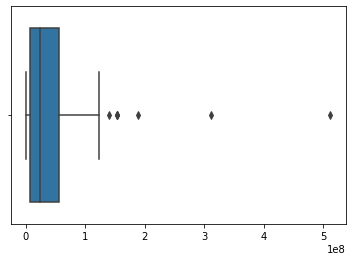

In [ ]:
sns.boxplot(x=summery_df.viewCount.values)
plt.show()

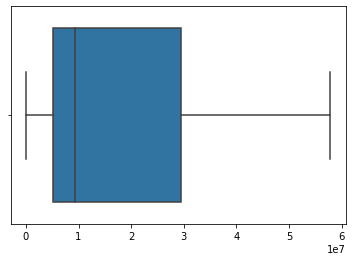

In [ ]:
sns.boxplot(x=summery_df.sort_values(by=['viewCount'],ascending=False).viewCount.loc[2:].values)
plt.show()

the boxplot when we remove Life of Boris and  Solutions channe row.

###### Subscriber Count

In [ ]:
top10subscriberCount =  summery_df.set_index('title').sort_values(by=['subscriberCount'],ascending=False).subscriberCount.head(10)

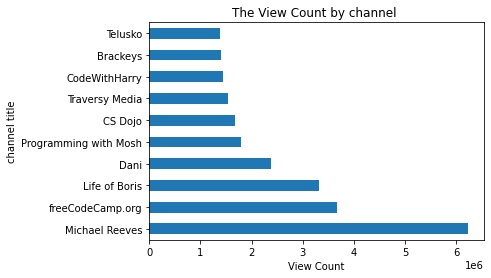

In [ ]:
plt.figure()
top10subscriberCount.plot.barh()
plt.xlabel('View Count')
plt.ylabel('channel title')
plt.title('The View Count by channel ')
plt.show()

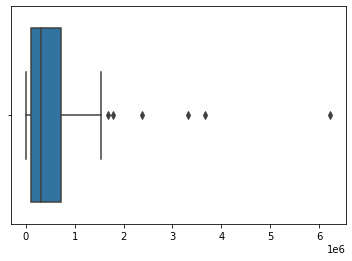

In [ ]:
sns.boxplot(x=summery_df.subscriberCount.values)
plt.show()

In [ ]:
# display the yougest channel
summery_df.publishedDate.max().date()

datetime.date(2020, 3, 7)

In [ ]:
summery_df.sort_values(by='publishedDate').head(10)

,channelName,title,channelId,url,description,countryCode,viewCount,subscriberCount,videoCount,publishedAt,uploads,publishedDate,country,countryOther,continent,gender
24,WesBos,Wes Bos,UCoebwHSTvwalADTJhps0emA,https://www.youtube.com/user/wesbos,"HTML, CSS, JavaScript and WordPress web develo...",CA,6790590,131000,234,2006-01-26T04:15:36Z,UUoebwHSTvwalADTJhps0emA,2006-01-26,Canada,Canada,North america,Male
33,Scott Hansellman,Scott Hanselman,UCL-fHOdarou-CR2XUmK48Og,https://www.youtube.com/user/shanselman,I'm a teacher. I speak all over to whomever wi...,US,8895355,124000,307,2006-03-15T10:14:39Z,UUL-fHOdarou-CR2XUmK48Og,2006-03-15,United States,United States,North america,Male
2,Corey Schafer,Corey Schafer,UCCezIgC97PvUuR4_gbFUs5g,https://www.youtube.com/user/schafer5,Welcome to my Channel. This channel is focused...,US,57821417,782000,230,2006-05-31T22:49:22Z,UUCezIgC97PvUuR4_gbFUs5g,2006-05-31,United States,United States,North america,Male
16,The Coding Train,The Coding Train,UCvjgXvBlbQiydffZU7m1_aw,https://thecodingtrain.com and https://www.you...,All aboard! The Coding Train is on its way wit...,US,85934046,1280000,1112,2006-07-03T18:24:29Z,UUvjgXvBlbQiydffZU7m1_aw,2006-07-03,United States,United States,North america,Male
54,chuck severance,Chuck Severance,UChYfrRp_CWyqOt-ZYJGOgmA,https://m.youtube.com/user/csev,NaN,US,7701297,61200,876,2006-08-19T14:24:00Z,UUhYfrRp_CWyqOt-ZYJGOgmA,2006-08-19,United States,United States,North america,Male
63,Ryan Dhungel,Ryan Dhungel,UCu47q4mYoq9t0bINCWaTsgA,https://www.youtube.com/c/narayandhungel,"Simplified Web Development Tutorials on PHP, L...",AU,248023,1950,162,2007-03-30T18:08:53Z,UUu47q4mYoq9t0bINCWaTsgA,2007-03-30,Australia,Australia,Oceania,Male
45,Derek Banas,Derek Banas,UCwRXb5dUK4cvsHbx-rGzSgw,https://www.youtube.com/c/derekbanas,I make tutorials based on your requests. I wil...,US,107285975,1130000,1158,2008-08-12T15:35:35Z,UUwRXb5dUK4cvsHbx-rGzSgw,2008-08-12,United States,United States,North america,Male
61,Abhishek Thakur,Abhishek Thakur,UCBPRJjIWfyNG4X-CRbnv78A,https://www.youtube.com/c/AbhishekThakurAbhi,"I make videos about applied machine learning, ...",NO,940855,47100,92,2009-05-24T11:41:32Z,UUBPRJjIWfyNG4X-CRbnv78A,2009-05-24,Norway,Norway,Europe,Male
8,Caleb Curry,Caleb Curry,UCZUyPT9DkJWmS_DzdOi7RIA,https://www.youtube.com/user/CalebTheVideoMaker2,Programming Made Fun and Simple \n\nHigh qual...,US,27947936,379000,1386,2009-08-18T18:32:42Z,UUZUyPT9DkJWmS_DzdOi7RIA,2009-08-18,United States,United States,North america,Male
1,Traversy Media,Traversy Media,UC29ju8bIPH5as8OGnQzwJyA,https://www.youtube.com/user/TechGuyWeb,Traversy Media features the best online web de...,US,140038994,1540000,879,2009-10-30T21:33:14Z,UU29ju8bIPH5as8OGnQzwJyA,2009-10-30,United States,United States,North america,Male


In [ ]:
summery_df.to_csv('summeryCleanDB.csv' ,index=False) #

##### group by year of creation

In [ ]:
summery_df['year'] = summery_df.publishedDate.dt.year

In [ ]:
summery_df.countryOther.value_counts().index

CategoricalIndex(['United States', 'India', 'Other', 'Canada', 'Australia',
                  'United Kingdom', 'Norway'],
                 categories=['Australia', 'Canada', 'India', 'Norway', 'Other', 'United Kingdom', 'United States'], ordered=False, dtype='category')

##### viewsCounts vs subric vd videosCount

In next section, we will be using Z-score to to fetlter outiers.  
corrolation between `viewCount`, `subscriberCount` and `videoCount` column.

In [ ]:
from scipy.stats import  zscore
import numpy as np



z_scores = zscore(summery_df[["viewCount", "subscriberCount",  'videoCount']])
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df = summery_df[filtered_entries]

In [ ]:
pd.cut(df.year, [2006, 2010, 2015, 2020], include_lowest=True).value_counts()

(2010.0, 2015.0]      28
(2015.0, 2020.0]      24
(2005.999, 2010.0]    12
Name: year, dtype: int64

In [ ]:
df['yearClass'] = pd.cut(df.year, [2006, 2010, 2015, 2020], include_lowest=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


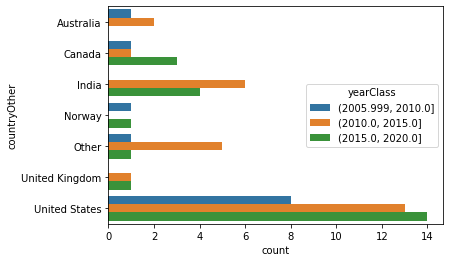

In [ ]:
sns.countplot(y="countryOther", hue="yearClass", data=df)

In [ ]:
df.shape

(64, 18)

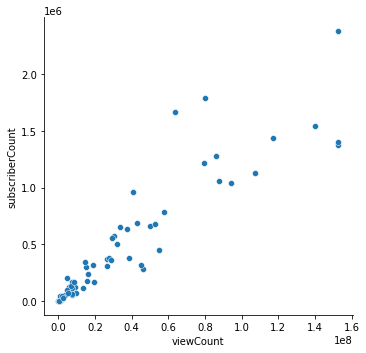

In [ ]:

_ = sns.relplot(x="viewCount", y="subscriberCount",  data=df)#hue="size",

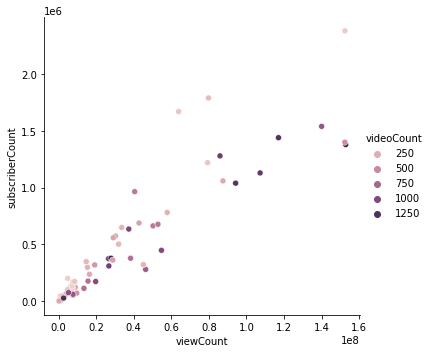

In [ ]:
_ = sns.relplot(x="viewCount", y="subscriberCount",  hue='videoCount',data=df)

In [ ]:
df['year'].value_counts()

2016    10
2015     9
2018     7
2012     6
2014     5
2011     5
2006     5
2017     4
2013     3
2009     3
2019     2
2010     2
2020     1
2008     1
2007     1
Name: year, dtype: int64

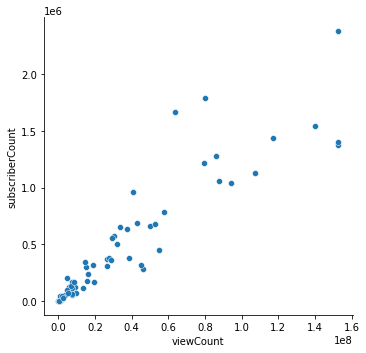

In [ ]:
_ = sns.relplot(x="viewCount", y="subscriberCount",  data=df)

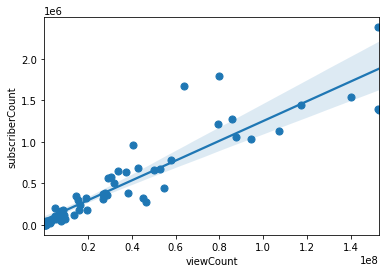

In [ ]:
_ = sns.regplot(x="viewCount", y="subscriberCount",data=df,  x_estimator=np.mean)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


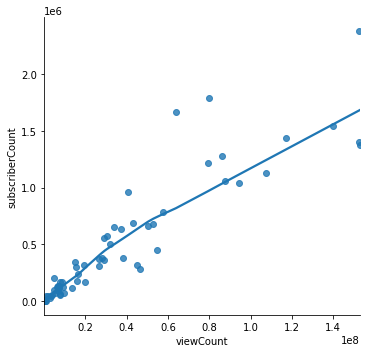

In [ ]:

_ = sns.lmplot(x="viewCount", y="subscriberCount",data=df,  lowess=True)

In [ ]:

# Compute the correlation matrix
corr = df.corr()
corr

,viewCount,subscriberCount,videoCount,year
viewCount,1.000000,0.915660,0.348746,-0.084516
subscriberCount,0.915660,1.000000,0.180674,0.012036
videoCount,0.348746,0.180674,1.000000,-0.355324
year,-0.084516,0.012036,-0.355324,1.000000


corrolation strong between `viewCount` and `subscriberCount`

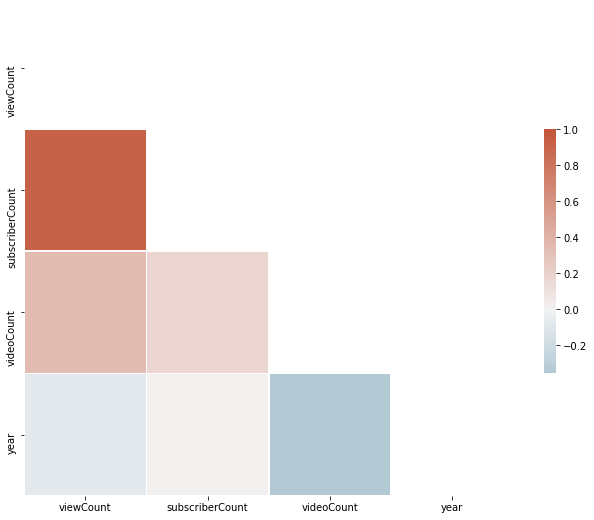

In [ ]:
# code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


It is weak correlation between `year` and `videoCount` . the intuitive idea that the  younber the channel is the lower is the total number of uploeded videos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 67
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   channelName      64 non-null     object        
 1   title            64 non-null     object        
 2   channelId        64 non-null     object        
 3   url              64 non-null     object        
 4   description      63 non-null     object        
 5   countryCode      64 non-null     category      
 6   viewCount        64 non-null     int64         
 7   subscriberCount  64 non-null     int32         
 8   videoCount       64 non-null     int32         
 9   publishedAt      64 non-null     object        
 10  uploads          64 non-null     object        
 11  publishedDate    64 non-null     datetime64[ns]
 12  country          64 non-null     category      
 13  countryOther     64 non-null     category      
 14  continent        64 non-null     category   

In [ ]:
df.describe(include='category')


,countryCode,country,countryOther,continent,yearClass
count,64,64,64,64,64
unique,13,13,7,5,3
top,US,United States,United States,North america,"(2010.0, 2015.0]"
freq,35,35,35,40,28


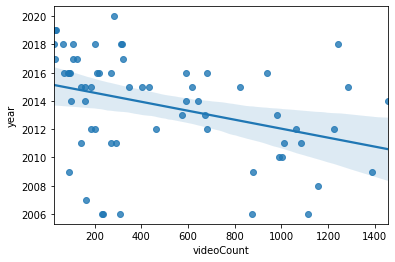

In [ ]:
_ = sns.regplot(x="videoCount", y="year", data=df)

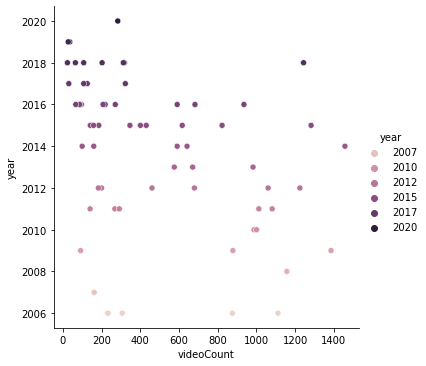

In [ ]:
_ = sns.relplot(x="videoCount", y="year", hue='year', data=df)

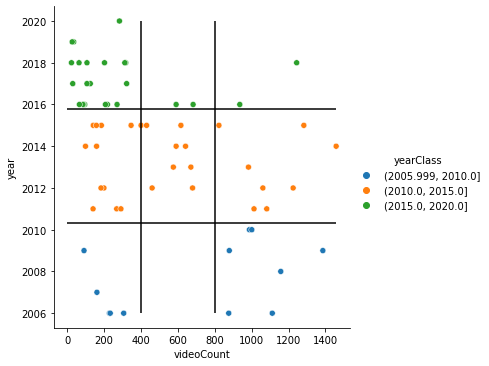

In [ ]:
sns.relplot(x="videoCount", y="year", hue='yearClass', data=df)
plt.hlines(2015.8, 0, df.videoCount.max())
plt.hlines(2010.3, 0, df.videoCount.max())
plt.vlines(400, 2006, 2020)
plt.vlines(800, 2006, 2020)
plt.show()

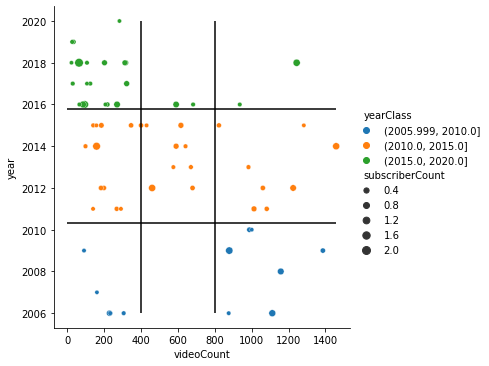

In [ ]:
sns.relplot(x="videoCount", y="year", hue='yearClass', size='subscriberCount',data=df)
plt.hlines(2015.8, 0, df.videoCount.max())
plt.hlines(2010.3, 0, df.videoCount.max())
plt.vlines(400, 2006, 2020)
plt.vlines(800, 2006, 2020)
plt.show()

We tree custer, In to top right group the most of the new channels created in 2016 or later, In to bottom  left to have less than 400 videos. the were there for created in 2010 or before have more than 800 videos. 

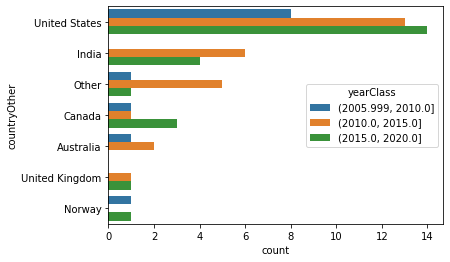

In [ ]:
sns.countplot(y="countryOther", hue="yearClass",order=summery_df.countryOther.value_counts().index, data=df)

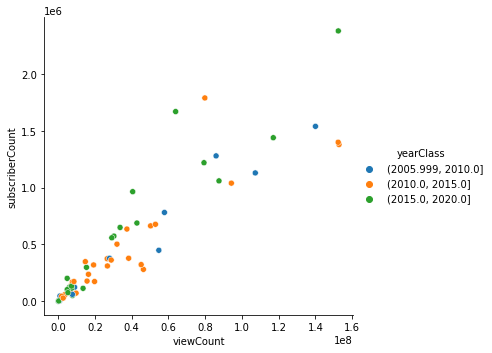

In [ ]:
_ = sns.relplot(x="viewCount", y="subscriberCount",  hue='yearClass',data=df)

In [ ]:
df.year.min()

2006

In [ ]:
df.year.max()

2020

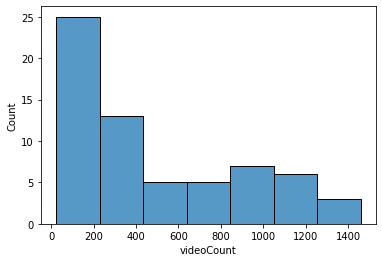

In [ ]:
sns.histplot(df, x='videoCount')

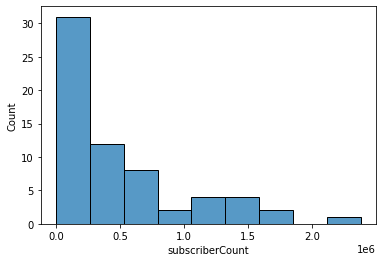

In [ ]:
_ = sns.histplot(df, x='subscriberCount',)

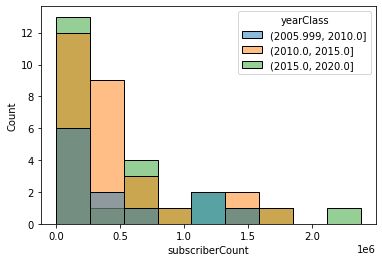

In [ ]:
_ = sns.histplot(df, x='subscriberCount', hue='yearClass')

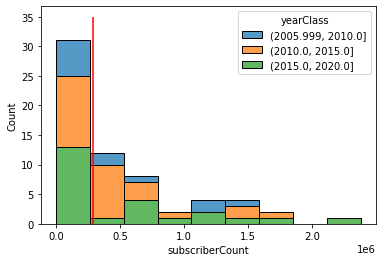

In [ ]:
sns.histplot(df, x='subscriberCount', hue='yearClass', multiple="stack")
plt.vlines(df.subscriberCount.median(),0,35, colors='red')

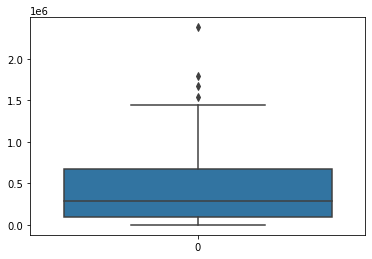

In [ ]:
_ = sns.boxplot(data=df.subscriberCount)

In [ ]:
quantiles = df.subscriberCount.quantile([0.25,0.5,0.75])
quantiles

0.25     99875.0
0.50    290000.0
0.75    667500.0
Name: subscriberCount, dtype: float64

In [ ]:
df['subscriberCountClass'] = pd.cut(df.subscriberCount, [0, quantiles[0.25], quantiles[0.75], df.subscriberCount.max()], include_lowest=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['subscriberCountClass'].value_counts()

(99875.0, 667500.0]      32
(667500.0, 2380000.0]    16
(-0.001, 99875.0]        16
Name: subscriberCountClass, dtype: int64

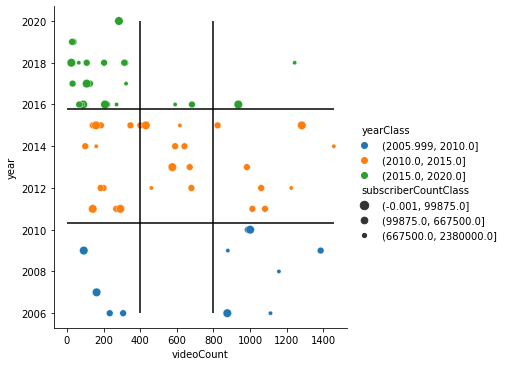

In [ ]:
sns.relplot(x="videoCount", y="year", hue='yearClass', size='subscriberCountClass',data=df)
plt.hlines(2015.8, 0, df.videoCount.max())
plt.hlines(2010.3, 0, df.videoCount.max())
plt.vlines(400, 2006, 2020)
plt.vlines(800, 2006, 2020)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_norm = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=numerics)), columns=df.select_dtypes(include=numerics).columns)

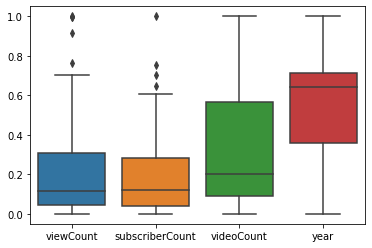

In [ ]:
sns.boxplot(data=df_norm)

In [ ]:
df.subscriberCount.median()

290000.0

In [ ]:
df.to_csv('data.csv', index=False)

### The next step
We will be collecting data for each video and playlist in a single channel. See [Extract YouTube video statistics and playlist]()